In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

In [74]:
data = pd.read_csv('../prcp_monthly.csv')
data['month'] = pd.to_datetime(data['month'])
data.head()

,index,month,prcp
0,0,2001-01-01,101.400000
1,1,2001-02-01,98.200000
2,2,2001-03-01,201.200000
3,3,2001-04-01,141.200000
4,4,2001-05-01,29.233333


## 1. Quarterly seasonality:

##### Quarterly data:

In [75]:
s1 = np.zeros(len(data))
s2 = np.zeros(len(data))
s3 = np.zeros(len(data))
s4 = np.zeros(len(data))

s1[(data['month'].dt.month >= 1) & (data['month'].dt.month <= 3)] = 1
s2[(data['month'].dt.month >= 4) & (data['month'].dt.month <= 6)] = 1
s3[(data['month'].dt.month >= 7) & (data['month'].dt.month <= 9)] = 1
s4[(data['month'].dt.month >= 10) & (data['month'].dt.month <= 12)] = 1

seasonal_data = data.copy()
seasonal_data['s1'] = s1
seasonal_data['s2'] = s2
seasonal_data['s3'] = s3
seasonal_data['s4'] = s4
seasonal_data['index2'] = seasonal_data['index']**2
seasonal_data['index3'] = seasonal_data['index']**3
seasonal_data.index = pd.date_range(start='2001-01-01', end='2020-12-31', freq='ME')

seasonal_data.head()

,index,month,prcp,s1,s2,s3,s4,index2,index3
2001-01-31,0,2001-01-01,101.400000,1.0,0.0,0.0,0.0,0,0
2001-02-28,1,2001-02-01,98.200000,1.0,0.0,0.0,0.0,1,1
2001-03-31,2,2001-03-01,201.200000,1.0,0.0,0.0,0.0,4,8
2001-04-30,3,2001-04-01,141.200000,0.0,1.0,0.0,0.0,9,27
2001-05-31,4,2001-05-01,29.233333,0.0,1.0,0.0,0.0,16,64


##### Train test split:

In [76]:
seasonal_train = seasonal_data[seasonal_data['month'].dt.year <= 2015]
seasonal_test = seasonal_data[seasonal_data['month'].dt.year > 2015]

#### Linear model:

`y_t = b_0*t + b_1*S_1 + b_2*S_2 + b_3*S_3 + b_4*S_4`

In [77]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(seasonal_train[['index', 's1', 's2', 's3', 's4']], seasonal_train['prcp'])
output = lm.predict(seasonal_data[['index', 's1', 's2', 's3', 's4']])

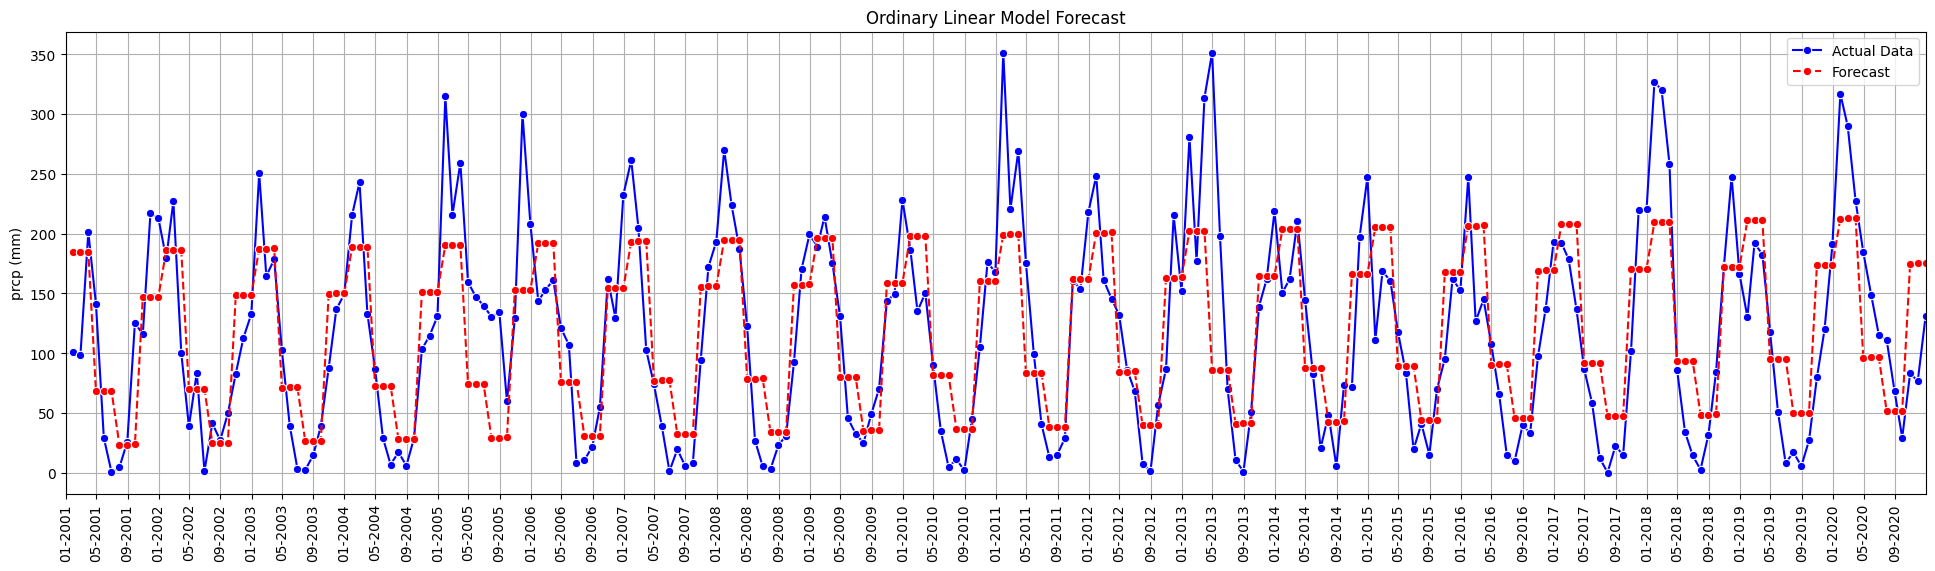

In [ ]:
output_copy = pd.Series(output, index=pd.date_range(start='2001-01-01', end='2020-12-31', freq='ME'))

plt.figure(figsize=(24, 6))
sns.lineplot(seasonal_data["prcp"], label="Actual Data", color="blue", marker="o")
sns.lineplot(output_copy, label="Forecast", color="red", linestyle="dashed", marker='o')
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.grid(True)
plt.ylabel("prcp (mm)")
plt.title("Ordinary Linear Model Forecast")
plt.legend()
# plt.savefig('../forecast/ordinary_linear_model.png')
plt.show()

In [79]:
np.mean((output[-60:] - seasonal_test["prcp"])**2)

np.float64(3116.6944592468767)

### Quadratic model:

`y_t = b_0*t + b_1*t^2 + b_1*S_1 + b_2*S_2 + b_3*S_3 + b_4*S_4`

In [80]:
lm2 = LinearRegression()
lm2.fit(seasonal_train[['index', 'index2', 's1', 's2', 's3', 's4']], seasonal_train['prcp'])
output2 = lm2.predict(seasonal_data[['index', 'index2', 's1', 's2', 's3', 's4']])

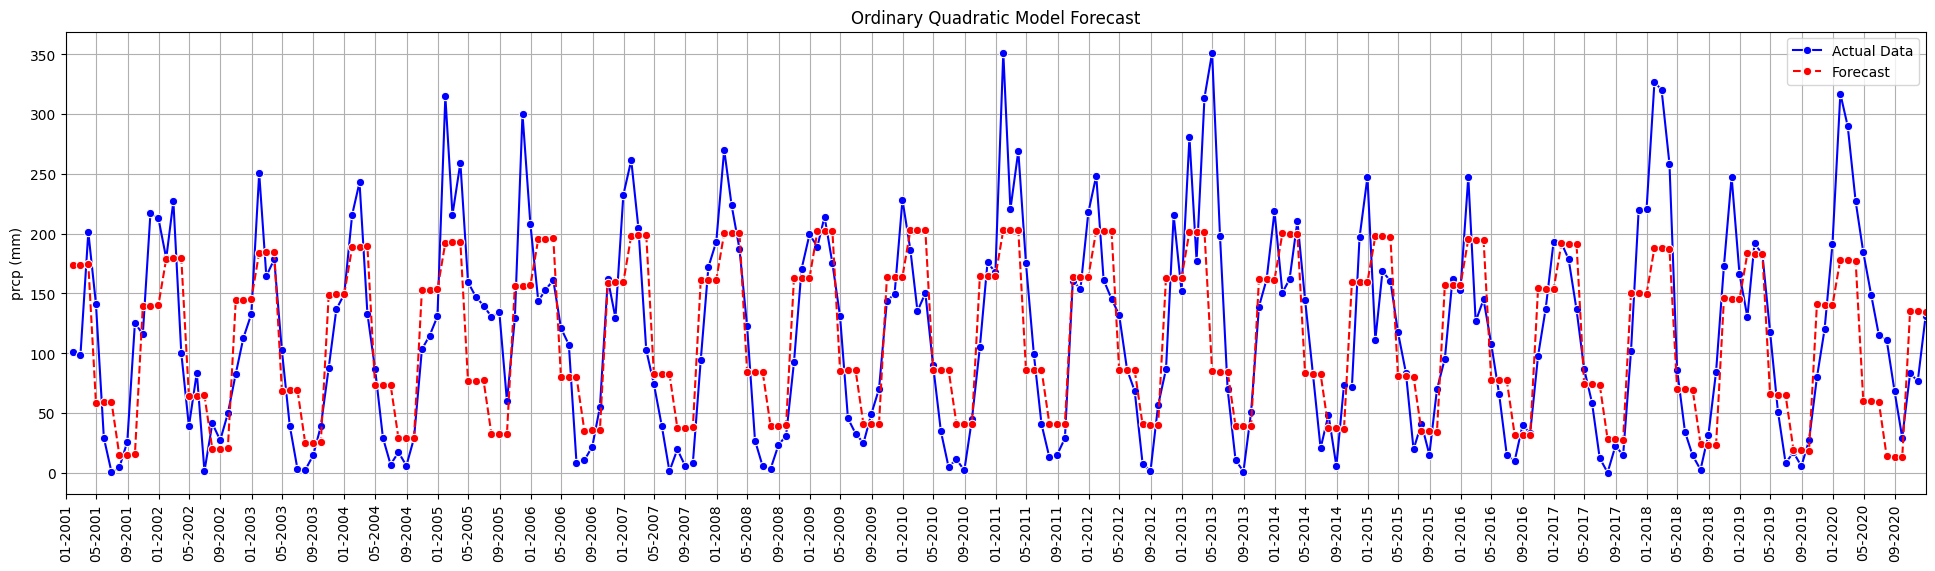

In [ ]:
output2_copy = pd.Series(output2, index=pd.date_range(start='2001-01-01', end='2020-12-31', freq='ME'))

plt.figure(figsize=(24, 6))
sns.lineplot(seasonal_data["prcp"], label="Actual Data", color="blue", marker="o")
sns.lineplot(output2_copy, label="Forecast", color="red", linestyle="dashed", marker='o')
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.grid(True)
plt.ylabel("prcp (mm)")
plt.title("Ordinary Quadratic Model Forecast")
plt.legend()
# plt.savefig('../forecast/ordinary_quadratic_model.png')
plt.show()

In [82]:
np.mean((output2[-60:] - seasonal_test["prcp"])**2)

np.float64(3310.8225008233144)

### Cubic model:

In [83]:
from sklearn.linear_model import LinearRegression

lm3 = LinearRegression()
lm3.fit(seasonal_train[['index', 'index2', 'index3', 's1', 's2', 's3', 's4']], seasonal_train['prcp'])
output3 = lm3.predict(seasonal_data[['index', 'index2', 'index3','s1', 's2', 's3', 's4']])

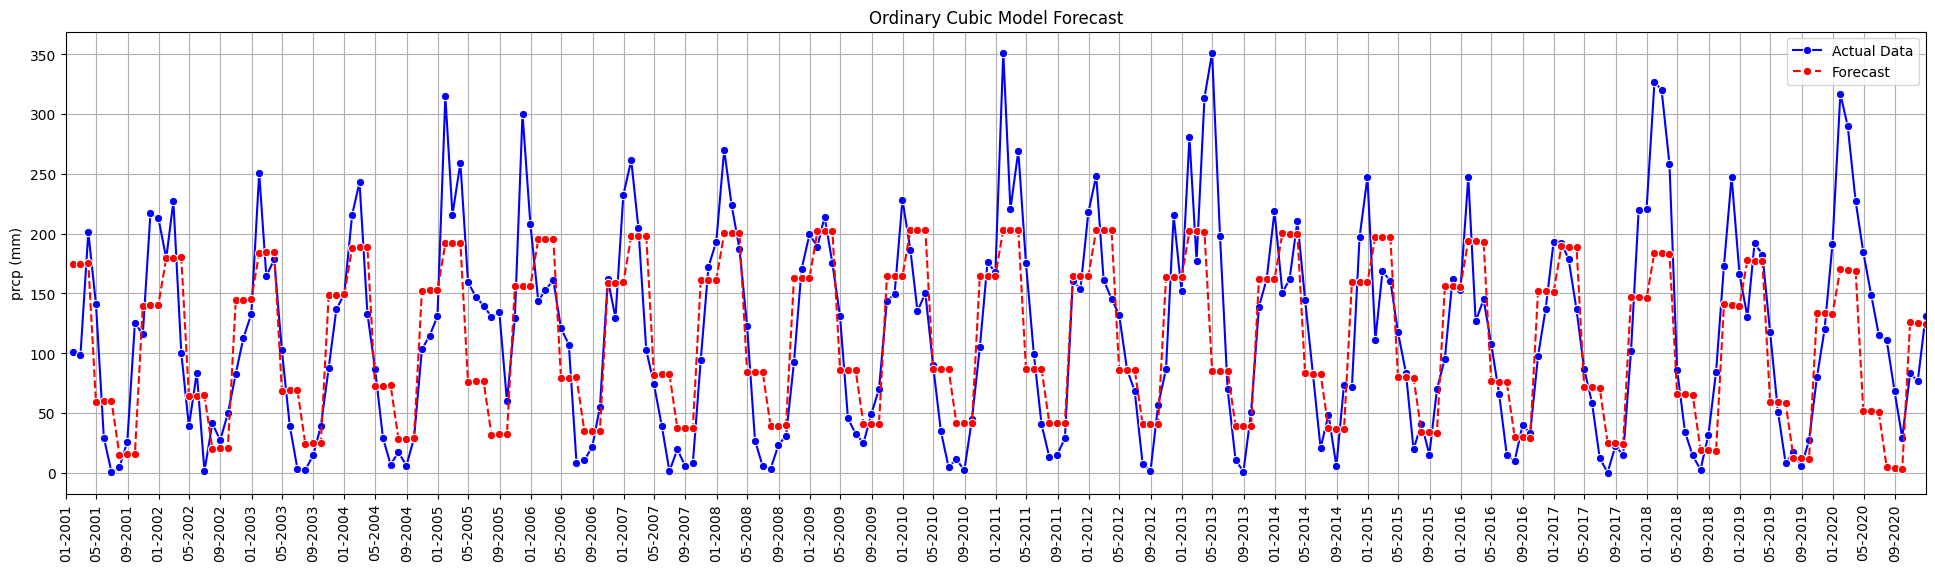

In [ ]:
output3_copy = pd.Series(output3, index=pd.date_range(start='2001-01-01', end='2020-12-31', freq='ME'))

plt.figure(figsize=(24, 6))
sns.lineplot(seasonal_data["prcp"], label="Actual Data", color="blue", marker="o")
sns.lineplot(output3_copy, label="Forecast", color="red", linestyle="dashed", marker='o')
plt.xlim(pd.to_datetime("2001-01-01"), pd.to_datetime("2020-12-31"))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=4)) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
plt.xticks(rotation=90)  
plt.grid(True)
plt.ylabel("prcp (mm)")
plt.title("Ordinary Cubic Model Forecast")
plt.legend()
# plt.savefig('../forecast/ordinary_cubic_model.png')
plt.show()

In [85]:
np.mean((output3[-60:] - seasonal_test["prcp"])**2)

np.float64(3545.9581471470765)